<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/master/deeplearningANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dataset.shape

(10000, 14)

In [6]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
##create dummy vriables
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [10]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
X = pd.concat([X,geography,gender],axis=1)

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
##Drop unnecessary colums
X = X.drop(['Geography','Gender'], axis =1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
#3 feature scaling
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
## lets make ANN

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
##initialising ANN

In [67]:
classifier = Sequential()

In [68]:
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim=11))

In [69]:
classifier.add(Dropout(0.3))

In [70]:
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))

In [71]:
classifier.add(Dropout(0.4))

In [72]:
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))

In [73]:
classifier.add(Dropout(0.2))

In [74]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [75]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                120       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                220       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 15)                315       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                

In [76]:
##comiling ANN,,categorical_crossentropy if nt bi
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
##fitting ANN to training set
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =100)

Epoch 1/100
536/536 [==============================] - 5s 7ms/step - loss: 0.6010 - accuracy: 0.7369 - val_loss: 0.4979 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5247 - accuracy: 0.7908 - val_loss: 0.4830 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4931 - accuracy: 0.7944 - val_loss: 0.4651 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4834 - accuracy: 0.7959 - val_loss: 0.4594 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4721 - accuracy: 0.7957 - val_loss: 0.4556 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4698 - accuracy: 0.7962 - val_loss: 0.4526 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4648 - accuracy: 0.7970 - val_loss: 0.4444 - val_accuracy: 0.7955

In [78]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


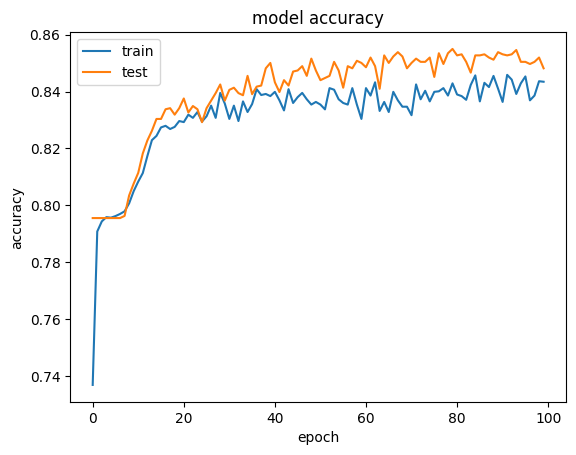

In [79]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [80]:
# predict test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [81]:
#make confusin mtrx
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

In [82]:
cm

array([[1560,   35],
       [ 253,  152]])

In [83]:
##accuracy

In [84]:
score = accuracy_score(y_pred,y_test)

In [85]:
score

0.856